<h1><span style="color:red ">TP1 communication sans fil </span></h1>

Latifa Ben Amor (2DNI1)

<h3>
<span style="color: #2980B9 "> I. Objectif :   </span>
    </h3>
    
on désire numériser un signal sinusoidale continue de la forme S(t)=sin(2 * pi * f * t)

<h3>
<span style="color: #2980B9 "> II. Echnatillonnage :   </span>
    </h3>

<h4>
<span style="color: orange "> 1.  Partie théorique :  </span>
    </h4>
    
L'échantillonnage d'un signal continu consiste à prélever des échantillons du signal pour obtenir un signal discret, c'est-à-dire une suite de nombres représentant le signal, dans le but de mémoriser, transmettre, ou traiter le signal.
==> l'échantillonnage intervient dans toute opération de conversion continu/discret.
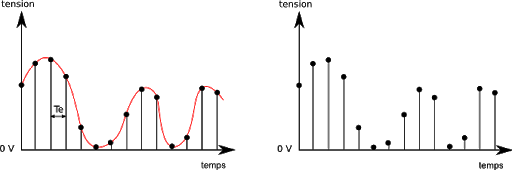

<h4>
<span style="color: red "> => L’échantillonnage ne doit pas détériorer le signal. En particulier il doit CONSERVER LE SPECTRE de S(t) et il doit permettre de restituer ce spectre en fin d’opérations.   </span>
    </h4>


#### + Théorème de Shannon :
Le théorème de Shannon concerne les signaux dont le spectre possède une fréquence maximale fmax, que l'on appelle des signaux à bande limitée, pour que le signal puisse être entièrement reconstruit à partir des échantillons, il faut et il suffit que :
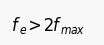

=> La fréquence d'échantillonnage doit être strictement supérieure à deux fois la plus grande fréquence présente dans le spectre du signal continu

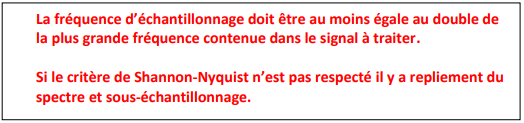

<h4>
<span style="color: orange "> 2.  Partie code (pratique) : :   </span>
    </h4

#### Importation des bibliothéques :

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mtp
import numpy as np
from math import *
from scipy.fftpack import fft, ifft, fftshift, ifftshift

#### Représentation du signal sinusoidale Sin(2 * pi * f *t) :

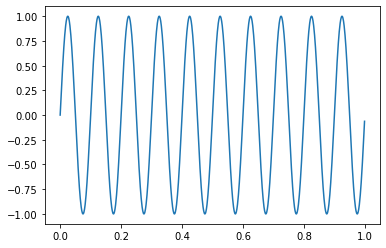

In [6]:
f0=10
fe=1000 #fréquence d'échantillonnage
te=1/fe #période d'échantillonnage
t=np.arange(0,1,te)
S=[sin(2*pi*f0*i) for i in t]
plt.plot(t,S)
plt.show()

#### Affichage de spectre du signal échantillonné : 

<ipython-input-7-4049afd752b1>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(f,abs(Sf))


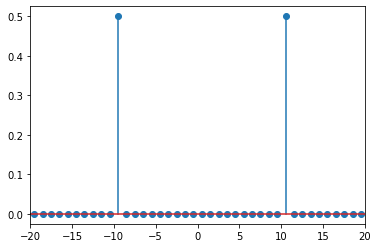

In [7]:
n=len(t)
A=np.fft.fft(S)
Sf=np.fft.fftshift(A)*(1/n)
f=np.linspace(-fe/2, fe/2,n)
figure1=plt.figure()
axis=figure1.add_subplot(1,1,1)
axis.set_xlim(-20,20)
plt.stem(f,abs(Sf))
plt.show()

<h4>
==> spectre d'amplitude bilatéral du signal sinusoidale ;
</h4>
    
<h4>==> l'échantillonnage dans le domaine temporel se traduit par une periodisation du spectre en bande de bas ;</h4>

<h4>==> La fréquence maximale est évidemment fmax=10 ;</h4>

<h4>==> Le spectre du signal discret comporte deux maxima, le premier à la fréquence 10, et son image à la fréquence -10.
</h4>

#### Reconstruction du signal d'origine à partir du signal échantillonné :

C:\Users\benam\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


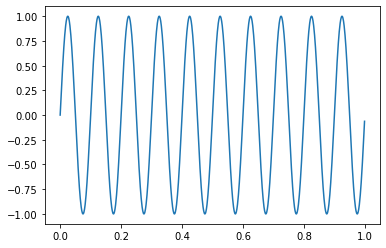

In [9]:
S_inv=ifft(ifftshift(Sf))*fe
plt.plot(t,S_inv)
plt.show()

<h4>==> D'après le théorème de Shannon, il est pourtant possible de reconstruire complètement le signal. Pour le faire, on a calculer la transformée de Fourier discrète des échantillons => la transformé de Fourier inverse.</h4>

<h3>
<span style="color: #2980B9 "> II. Quantification :   </span>
    </h3>

<h4>
<span style="color: orange "> 1.  Partie théorique : </span>
    </h4>
    
L’opération de quantification consiste à attribuer un nombre binaire à toute valeur prélevée au signal
lors de l’échantillonnage :
Chaque niveau de est codé sur p bits, chaque bit pouvant prendre deux valeurs (0 ou 1) donc un convertisseur à p bits possède 2^p niveaux de quantification.
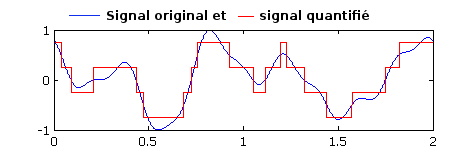

<h4>
<span style="color: orange "> 1.  Partie code : </span>
    </h4>

In [10]:
n=3
smin=min(S)
smax=max(S)
pas=(smax-smin)/(2^n)

<h4>==> taille du code=3 => donc on peut avoir 2^3=8 code, on les affecte aux niveaux de quantification</h4>

<h4>==> le pas de quantification est l'intervalle entre deux tensions successives .</h4>

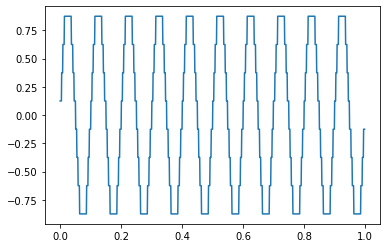

In [16]:

Sq=[]
for i in S:
    a=floor((i-smin)/pas)
    if (i!=smax):
        Sq.append(a*pas+smin+pas/2)
    else:
        Sq.append(i-pas/2)
 

             
plt.plot(t,Sq)
plt.show()

<h4>==> Le schéma ci-dessus représente une partie de la caractéristique de transfert d’un convertisseur 3 bits ; à tous les 
    
niveaux de tension d’un même palier, le convertisseur fait donc correspondre un seul et même nombre binaire;
    
==> Considérons un CAN 3 bits, il n’y a donc que 2^3= 8 valeurs possibles attribuables à toutes les valeurs prélevées lors de l’échantillonnage ;
    
==> L’opération se fait donc avec une perte d’information d’autant plus grande que p est petit.</h4>

<h3>
<span style="color: #2980B9 "> II. Codage :   </span>
    </h3>

<h4>
<span style="color: orange "> 1.  Partie théorique : </span>
    </h4>
Pour que la transmission soit optimale, il est nécessaire que le signal soit codé de façon à faciliter sa transmission sur le support physique.

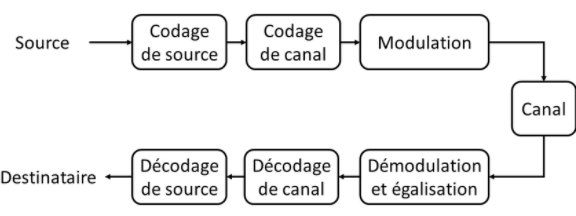

<span style="color: red">=> Le codage binaire à symbole est l'étape qui génère un signal discret à partir des données numériques. Chaque élément  de ce signal est appelé symbole , peut être réel ou complexe, et est associé à un ou plusieurs bits issus de la source d'informations. On définit alors un second débit sur le canal, le débit symbole, qui est le nombre de symboles transmis par unité de temps. Il est mesuré en bauds et est égal au débit binaire divisé par le nombre de bits représenté par chaque symbole.</span>

<h4>
<span style="color: orange "> 1.  Partie code : </span>
    </h4>

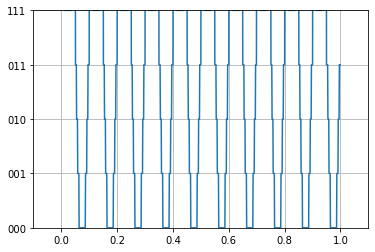

In [28]:
Sc=[]
Sq_min=min(Sq)

for i in Sq:
    c=((i-Sq_min)/pas)
    Sc.append(format(int(c),"03b"))
    
Sc_min=min(Sc)
Sc_max=max(Sc)
tmin=min(t)
tmax=max(t)
plt.plot(t,Sc)
plt.axis([tmin-0.1,tmax+0.1,Sc_min,Sc_max])
plt.grid()
plt.show()

<h4>==> Chaque élément  de ce signal est appelé symbole , et est associé à un ou plusieurs bits issus de la source d'informations qui est le signal quantifié</h4>